- 効用関数を「特定化」：相対的危険回避度一定(constant relative risk aversion, CRRA)型効用関数

$$
  u(c) = \frac{c^{1-\gamma}-1}{1-\gamma}
$$

- $1/\gamma$は異時点間の代替の弾力性(intertemporal elasticity of substitution)

- $\gamma \rightarrow 1$のとき、ロピタルの法則(L'Hopital's rule)より、$u(c)=\ln(c)$

- 異時点間の代替の弾力性は以下で定義される：

$$
  \frac{d\ln(c_{2}/c_{1})}{dr}
$$

- オイラー方程式より、

\begin{align*}
  & 1 = (1+r)\beta(c_{2}/c_{1})^{-\gamma} \\
  \Leftrightarrow & 0 = -\rho -\gamma\ln(c_{2}/c_{1}) + r \\
  \Leftrightarrow & \gamma\ln(c_{2}/c_{1}) = r-\rho \\
  & \therefore \frac{d\ln(c_{2}/c_{1})}{dr} = \frac{1}{\gamma} 
\end{align*}

ここで、$\ln(1+r) \approx r, \beta = (1+\rho)^{-1} \Leftrightarrow \ln\beta \approx -\rho $

- ロピタルの法則：$f(a)=g(a)=0$のとき

$$
  \lim_{x \rightarrow a}\frac{f(x)}{g(x)}=\lim_{x \rightarrow a}\frac{f'(x)}{g'(x)}
$$

- ここで、$f(\gamma)=c^{1-\gamma}-1=\big[\exp(\ln(c))\big]^{1-\gamma}-1=\exp\big[(1-\gamma)\ln(c)\big]-1, g(\gamma)=1-\gamma$とすると

\begin{align*}
  & \lim_{\gamma \rightarrow 1}\frac{f(\gamma)}{g(\gamma)} \\
  =& \lim_{\gamma \rightarrow 1}\frac{f'(\gamma)}{g'(\gamma)} \\
  =& \lim_{\gamma \rightarrow 1}\frac{\exp\big[(1-\gamma)\ln(c)\big]\big(-\ln(c)\big)}{-1} = \ln(c)
\end{align*}


In [19]:
%%file CRRA.m
function util = CRRA(cons, gamma)

if gamma ~= 1
%     util = cons.^(1-gamma)./(1-gamma);
    util = (cons.^(1-gamma)-1)./(1-gamma);
else
    util = log(cons);
end

Created file 'C:\Users\takeki\Documents\macrotopicsA2020\CRRA.m'.


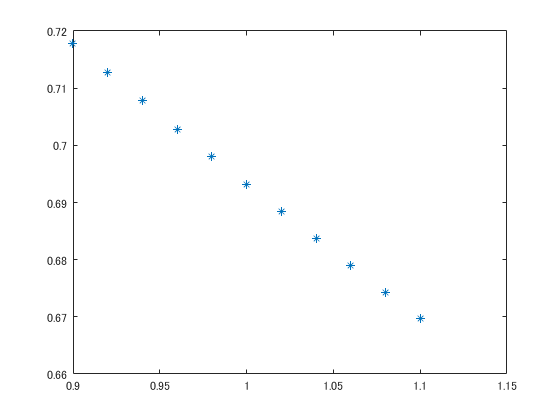

In [2]:
gvec = linspace(0.9,1.1,11)';
uvec = zeros(11,1);
cons = 2.0;

for i = 1:11

    gamma = gvec(i);
    uvec(i) = CRRA(cons,gamma);
    
end

plot(gvec,uvec,'*')

- 経済主体の最適化問題は、各$w_{i}$ for $i=1,\dots,I$について、

$$
  \max_{a} \frac{[w_{i}-a]^{1-\gamma}}{1-\gamma}+\beta\frac{[(1+r)-a]^{1-\gamma}}{1-\gamma} \tag{6}
$$

となるが、操作変数$a\in\mathbb{R}$については任意の実数をとりうる

- どうやって(6)式の解を得ればよいのであろうか？


- とりあえず、最適化(optimization)と呼ばれるライブラリを使う
    - MATLABであれば、Optimization Toolboxにある関数fminsearchやfminbnd
    - Pythonであれば、SciPyにある関数fmin
    - Juliaであれば、Optim.jlにある関数